## Contents
** 1. Loading the dataset.**

** 2. Summarizing the dataset.**

** 3. Visualizing the dataset.**

** 4. Evaluating algorithms.**

** 5. Making predictions.**

** 6. Start with XGBoost**


## 1. Loading the dataset

### 1.1 Check the versions of libraries

In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
scipy: 1.4.1
numpy: 1.19.5
matplotlib: 3.2.2
pandas: 1.1.5
sklearn: 0.22.2.post1


### 1.2 Import libraries

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # using for plots
import seaborn as sns #using for plots
%matplotlib inline
from pandas.plotting import scatter_matrix

from sklearn import model_selection
from sklearn.model_selection import train_test_split # split train and test sets

from sklearn.preprocessing import StandardScaler # for scaling 
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting Machine
from sklearn.ensemble import GradientBoostingClassifier
# Cross Validation Score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# import warnings
# warnings.filterwarnings('ignore')


### 1.3 Load the dataset

In [6]:
# Load dataset
dataset = pd.read_csv('Iris.csv')

In [7]:
# shape
print(dataset.shape)

(150, 6)


In [8]:
# head
dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
dataset.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### 2.4 Covariance on data


In [12]:
dataset.cov()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1887.500000,25.782886,-7.492282,67.667785,29.832215
SepalLengthCm,25.782886,0.685694,-0.039268,1.273682,0.516904
SepalWidthCm,-7.492282,-0.039268,0.188004,-0.321713,-0.117981
PetalLengthCm,67.667785,1.273682,-0.321713,3.113179,1.296387
PetalWidthCm,29.832215,0.516904,-0.117981,1.296387,0.582414


### 2.5 Correlation matrix of data 

In [13]:
dataset.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [14]:
#Remove a column from the data
dataset = dataset.drop('Id',axis=1)

In [15]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
dataset.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

### 2.6 Breakdown of the data by the class variable.

In [18]:
# class distribution
dataset.groupby('Species').size()
# dataset.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## 3. Data Visualization


### 3.1 Univariate Plots

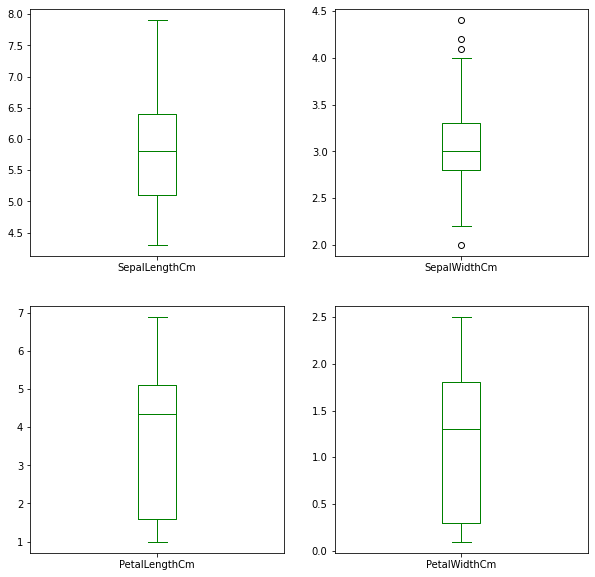

In [19]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False,color="green", figsize=(10,10))
plt.show()

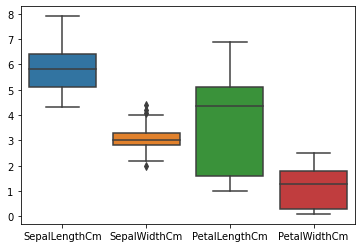

In [20]:
sns.boxplot(data=dataset)

####  Histogram of each input variable to get an idea of the distribution.

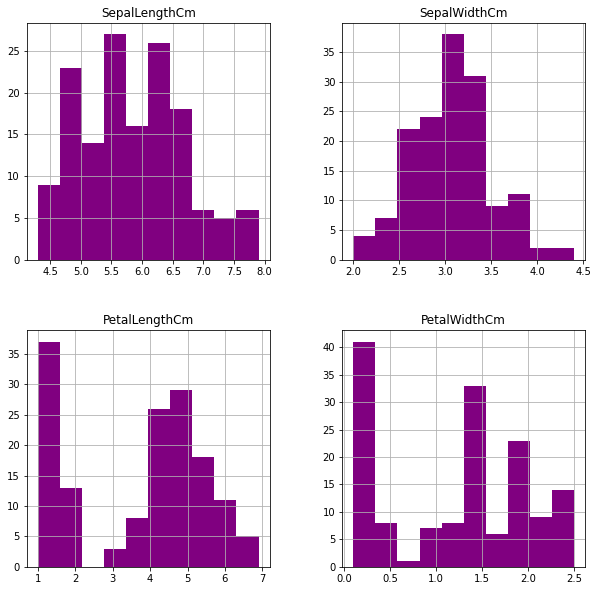

In [21]:
# histograms
dataset.hist(color="purple",figsize=(10,10))
plt.show()

### 3.2 Multivariate Plots

Using seaboarns package we can show rich plots. I used pairplot function to show scatter plots.

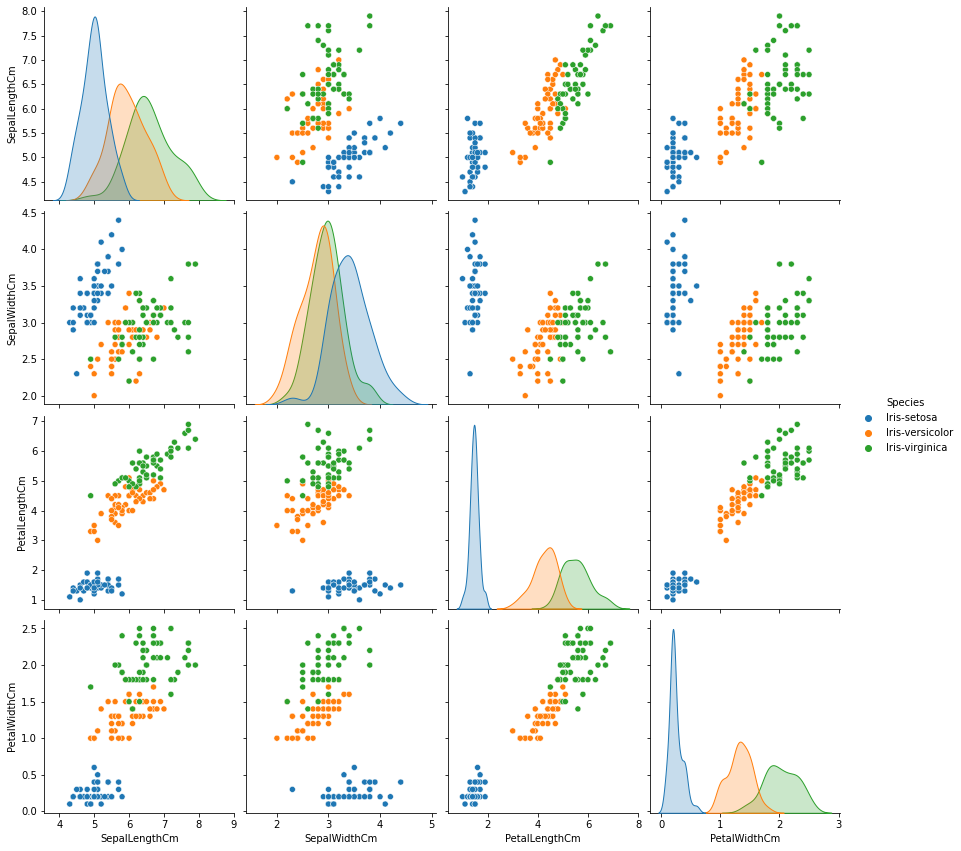

In [22]:
sns.pairplot(dataset, hue="Species", height=3, diag_kind="kde")
plt.show()

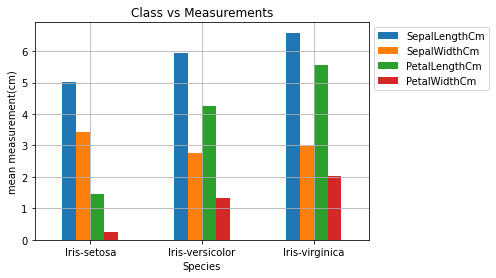

In [23]:
# print the mean for each column by species
dataset.groupby(by = "Species").mean()
# plot for mean of each feature for each label class
dataset.groupby(by = "Species").mean().plot(kind="bar")
plt.title('Class vs Measurements')
plt.ylabel('mean measurement(cm)')
plt.xticks(rotation=0)  # manage the xticks rotation
plt.grid(True)
# Use bbox_to_anchor option to place the legend outside plot area to be tidy
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

### Correlation Matrix
The correlation function uses Pearson correlation coefficient, which results in a number
between -1 to 1. A strong negative relationship is indicated by a coefficient closer to -1
and a strong positive correlation is indicated by a coefficient toward 1

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


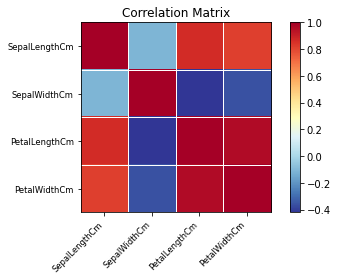

In [24]:
# create correlation matrix
corr = dataset.corr()
print(corr)
import statsmodels.api as sm
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [25]:
dataset.Species = dataset.Species.astype('category')

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   SepalLengthCm  150 non-null    float64 
 1   SepalWidthCm   150 non-null    float64 
 2   PetalLengthCm  150 non-null    float64 
 3   PetalWidthCm   150 non-null    float64 
 4   Species        150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [27]:
dataset.Species.cat.codes.head()

0    0
1    0
2    0
3    0
4    0
dtype: int8

In [28]:
dataset.Species = dataset.Species.cat.codes

In [29]:
dataset.Species.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int8

In [30]:
dataset.Species.tail()

145    2
146    2
147    2
148    2
149    2
Name: Species, dtype: int8

In [31]:
dataset.columns.values

array(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'], dtype=object)

### 4.1 Create a Validation Dataset
**Split the data into train and test sets with 80-20%**

In [32]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.2, 
random_state=42)

In [33]:
X_train.shape[0],Y_train.shape[0]

(120, 120)

In [34]:
X_validation.shape[0],Y_validation.shape[0]

(30, 30)

### 4.2 Test Harness

We will use 10-fold cross validation to estimate accuracy.
This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

In [35]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_validation = scalar.transform(X_validation)

In [36]:
X_train[:5]

array([[-1.47393679,  1.22037928, -1.5639872 , -1.30948358],
       [-0.13307079,  3.02001693, -1.27728011, -1.04292204],
       [ 1.08589829,  0.09560575,  0.38562104,  0.28988568],
       [-1.23014297,  0.77046987, -1.21993869, -1.30948358],
       [-1.7177306 ,  0.32056046, -1.39196294, -1.30948358]])

### 4.3 Build Models
Let’s evaluate 6 different algorithms:
*  Logistic Regression (LR)
* Linear Discriminant Analysis (LDA)
* K-Nearest Neighbors (KNN).
* Classification and Regression Trees (CART).
* Gaussian Naive Bayes (NB).
* Support Vector Machines (SVM).


In [37]:
logis = LogisticRegression()
logis.fit(X_train,Y_train)
prediction=logis.predict(X_validation)
print("logistic regression::\n",confusion_matrix(Y_validation,prediction),"\n")

logistic regression::
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]] 



In [38]:
svm = SVC()
svm.fit(X_train,Y_train)
prediction=svm.predict(X_validation)
print("SVM ::\n",confusion_matrix(Y_validation,prediction),"\n")

SVM ::
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]] 



In [39]:
    knn = KNeighborsClassifier()
    knn.fit(X_train,Y_train)
    prediction=knn.predict(X_validation)
    print("KNN ::\n",confusion_matrix(Y_validation,prediction),"\n")

KNN ::
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]] 



In [40]:
dTmodel = DecisionTreeClassifier()
dTmodel.fit(X_train,Y_train)
prediction=dTmodel.predict(X_validation)
print("DecisionTree ::\n",confusion_matrix(Y_validation,prediction),"\n")

DecisionTree ::
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]] 



In [41]:
rForest = RandomForestClassifier()
rForest.fit(X_train,Y_train)
prediction=rForest.predict(X_validation)
print("RandomForest ::\n",confusion_matrix(Y_validation,prediction),"\n")

RandomForest ::
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]] 



In [42]:
grBoosting = GradientBoostingClassifier()
grBoosting.fit(X_train,Y_train)
prediction=grBoosting.predict(X_validation)
print("GradientBoosting ::\n",confusion_matrix(Y_validation,prediction))

GradientBoosting ::
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [43]:
#using cross_val_score
logis = LogisticRegression()
    
scores = cross_val_score(logis,X_train,Y_train,cv=5)
print("Accuracy for logistic regresion: mean: {0:.2f} 2sd: {1:.2f}".format(scores.mean(),scores.std() * 2))
print("Scores::",scores)
print("\n")

scores2 = cross_val_score(svm,X_train,Y_train,cv=5)
print("Accuracy for SVM: mean: {0:.2f} 2sd: {1:.2f}".format(scores2.mean(),scores2.std() * 2))
print("Scores::",scores)
print("\n")

scores3 = cross_val_score(knn,X_train,Y_train,cv=5)
print("Accuracy for KNN: mean: {0:.2f} 2sd: {1:.2f}".format(scores3.mean(),scores3.std() * 2))
print("Scores::",scores)
print("\n")

scores4 = cross_val_score(dTmodel,X_train,Y_train,cv=5)
print("Accuracy for Decision Tree: mean: {0:.2f} 2sd: {1:.2f}".format(scores4.mean(),scores4.std() * 2))
print("Scores::",scores4)
print("\n")

scores5 = cross_val_score(rForest,X_train,Y_train,cv=5)
print("Accuracy for Random Forest: mean: {0:.2f} 2sd: {1:.2f}".format(scores5.mean(),scores5.std() * 2))
print("Scores::",scores5)
print("\n")

scores6 = cross_val_score(grBoosting,X_train,Y_train,cv=5)
print("Accuracy for Gradient Boosting: mean: {0:.2f} 2sd: {1:.2f}".format(scores6.mean(),scores6.std() * 2))
print("Scores::",scores6)
print("\n")

Accuracy for logistic regresion: mean: 0.96 2sd: 0.09
Scores:: [0.95833333 1.         0.875      1.         0.95833333]


Accuracy for SVM: mean: 0.95 2sd: 0.12
Scores:: [0.95833333 1.         0.875      1.         0.95833333]


Accuracy for KNN: mean: 0.93 2sd: 0.11
Scores:: [0.95833333 1.         0.875      1.         0.95833333]


Accuracy for Decision Tree: mean: 0.94 2sd: 0.07
Scores:: [0.95833333 0.95833333 0.875      0.95833333 0.95833333]


Accuracy for Random Forest: mean: 0.94 2sd: 0.11
Scores:: [0.95833333 0.95833333 0.83333333 1.         0.95833333]


Accuracy for Gradient Boosting: mean: 0.94 2sd: 0.07
Scores:: [0.95833333 0.95833333 0.875      0.95833333 0.95833333]




In [44]:
#Here we are testing various predictive algorithms from scikit-learn
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

LR: 0.950000 (0.055277)
LDA: 0.975000 (0.038188)
KNN: 0.941667 (0.053359)
CART: 0.941667 (0.053359)
Random Forest: 0.941667 (0.053359)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Gradient Boosting: 0.933333 (0.062361)
NB: 0.950000 (0.055277)
SVM: 0.950000 (0.055277)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GridSearchCV and RandomizedSearchCV are ways to tune hyper parameters.

In [ ]:
clf = RandomForestClassifier()
#Random Forest
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 4),
              "min_samples_split": sp_randint(2, 4),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 5
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

random_search.fit(X_train, Y_train)
print(random_search.best_params_)
print(random_search.best_estimator_)
confusion_matrix(Y_validation,random_search.predict(X_validation))

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'min_samples_split': 3}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

Using **GridSearchCV** to tune parameters

In [ ]:
# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 4],
              "min_samples_split": [2, 3, 4],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
confusion_matrix(Y_validation,grid_search.predict(X_validation))

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_split': 4}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

### 4.4 Select Best Model

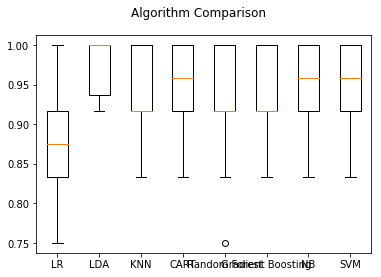

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 5. Make Predictions

**Make predictions using KNN**

In [ ]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Make predictions using SVM**

In [ ]:
# Make predictions on validation dataset
svn = SVC()
svn.fit(X_train, Y_train)
predictions = svn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Test predictions in data input


In [ ]:
#Input Vector 
X_new = numpy.array([[1, 2.1, 4, 0.2], [  4.7, 3, 1.3, 0.2 ],[  3.1, 1, 2.3, 0.3 ]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (3, 4)


In [ ]:
prediction = svn.predict(X_new)

### Test result prediction

In [ ]:
#Prediction of the species from the input vector
print("Prediction of Species: {}".format(prediction))

Prediction of Species: [2. 2. 2.]


## 6. Start with XGBoost

**XGBoost is one of the most popular machine learning algorithm these days. Regardless of the type of prediction task at hand; regression or classification.**

**Create the Xgboost specific DMatrix data format from the numpy array. **

**Encode string class values as integers**

In [ ]:
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder_t = label_encoder.fit(Y_train)
label_encoder_v = label_encoder.fit(Y_validation)
label_encoded_yt = label_encoder.transform(Y_train)
label_encoded_yv = label_encoder.transform(Y_validation)

In [ ]:
dtrain = xgb.DMatrix(X_train, label=label_encoded_yt)
dtest = xgb.DMatrix(X_validation, label=label_encoded_yv)

**Use svmlight for less memory consumption, first dump the numpy array into svmlight format and then just pass the filename to DMatrix:**

In [ ]:
from sklearn.datasets import dump_svmlight_file

dump_svmlight_file(X_train, label_encoded_yt, 'dtrain.svm', zero_based=True)
dump_svmlight_file(X_validation, label_encoded_yv, 'dtest.svm', zero_based=True)
dtrain_svm = xgb.DMatrix('dtrain.svm')
dtest_svm = xgb.DMatrix('dtest.svm')

[18:25:14] 120x4 matrix with 480 entries loaded from dtrain.svm
[18:25:14] 30x4 matrix with 120 entries loaded from dtest.svm


**Set the parameters:**

In [ ]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

Different datasets perform better with different parameters.

### Train
 
Finally the training can begin. 

In [ ]:
bst = xgb.train(param, dtrain, num_round)

In [ ]:
# To see how the model looks you can also dump it in human readable form:
# bst.dump_model('dump.raw.txt')

**Use the model to predict classes for the test set:**

In [ ]:
preds = bst.predict(dtest)
preds

array([[0.00563804, 0.97755206, 0.01680986],
       [0.98254657, 0.01395846, 0.00349498],
       [0.00363749, 0.00615226, 0.9902103 ],
       [0.00564738, 0.97917044, 0.0151822 ],
       [0.00540075, 0.93640935, 0.0581899 ],
       [0.98607963, 0.0104128 , 0.00350755],
       [0.00504762, 0.98975813, 0.00519427],
       [0.0156953 , 0.06653062, 0.917774  ],
       [0.0063378 , 0.94877166, 0.04489058],
       [0.00438964, 0.99041265, 0.0051977 ],
       [0.01785045, 0.07566603, 0.9064835 ],
       [0.99054164, 0.00561866, 0.00383973],
       [0.98254657, 0.01395846, 0.00349498],
       [0.990855  , 0.00562044, 0.00352453],
       [0.990855  , 0.00562044, 0.00352453],
       [0.00435676, 0.9863815 , 0.00926175],
       [0.0028351 , 0.00545694, 0.991708  ],
       [0.00506935, 0.98753244, 0.00739827],
       [0.00435527, 0.98265946, 0.01298527],
       [0.00283684, 0.00484793, 0.9923152 ],
       [0.990855  , 0.00562044, 0.00352453],
       [0.01177546, 0.08546324, 0.90276134],
       [0.

Here each column represents class number 0, 1, or 2. For each line we need to select that column where the probability is the highest:

In [ ]:
import numpy as np
best_preds = np.asarray([np.argmax(line) for line in preds])

Now we get a nice list with predicted classes:

In [ ]:
best_preds

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

**Determine the precision of this prediction:**

In [ ]:
from sklearn.metrics import precision_score
print(precision_score(label_encoded_yv, best_preds, average='macro'))

1.0


**Perfect! Now save the model for later use:**

In [ ]:
from sklearn.externals import joblib
joblib.dump(bst, 'bst_model.pkl', compress=True)
# bst = joblib.load('bst_model.pkl') # load it later

/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['bst_model.pkl']